## **FAIZAL RIZA**
### akuisal@gmail.com
### cohort id : L144YWD051

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
print("5 baris pertama dataset:")
display(df.head())

5 baris pertama dataset:


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Informasi dataset:")
df.info()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Accou

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
#statistik deskriptif numerik
print("Statistik deskriptif (numerik):")
display(df.describe().T)

Statistik deskriptif (numerik):


,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2511.0,297.656468,292.230367,0.26,81.3100,211.36,413.1050,1919.11
CustomerAge,2519.0,44.678444,17.837359,18.00,27.0000,45.00,59.0000,80.00
TransactionDuration,2511.0,119.422939,70.078513,10.00,63.0000,112.00,161.0000,300.00
LoginAttempts,2516.0,1.121622,0.594469,1.00,1.0000,1.00,1.0000,5.00
AccountBalance,2510.0,5113.438124,3897.975861,101.25,1504.7275,4734.11,7672.6875,14977.99


In [6]:
#statistik deskriptif kategorikal
print("Statistik deskriptif (kategorial):")
display(df.describe(include=['object', 'category']).T)

Statistik deskriptif (kategorial):


,count,unique,top,freq
TransactionID,2508,2484,TX001748,2
AccountID,2516,495,AC00362,12
PreviousTransactionDate,2509,2485,2023-10-20 17:53:13,2
TransactionType,2507,2,Debit,1942
Location,2507,43,Fort Worth,71
DeviceID,2507,681,D000573,9
IP Address,2517,591,200.136.146.93,12
MerchantID,2514,100,M026,46
Channel,2510,3,Branch,868
CustomerOccupation,2514,4,Student,657


In [7]:
# Menampilkan statistik deskriptif semuanya
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,2508,2484,TX001748,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountID,2516,495,AC00362,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionAmount,2511.0,NaN,NaN,NaN,297.656468,292.230367,0.26,81.31,211.36,413.105,1919.11
PreviousTransactionDate,2509,2485,2023-10-20 17:53:13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionType,2507,2,Debit,1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2507,43,Fort Worth,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceID,2507,681,D000573,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IP Address,2517,591,200.136.146.93,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MerchantID,2514,100,M026,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,2510,3,Branch,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [8]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Daftar kolom ID berdasar info df
id_cols = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate','TransactionDate']

# Untuk fitur numerik dan kategorikal
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols_no_id = [col for col in num_cols if col not in id_cols]
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols_no_id = [col for col in cat_cols if col not in id_cols]

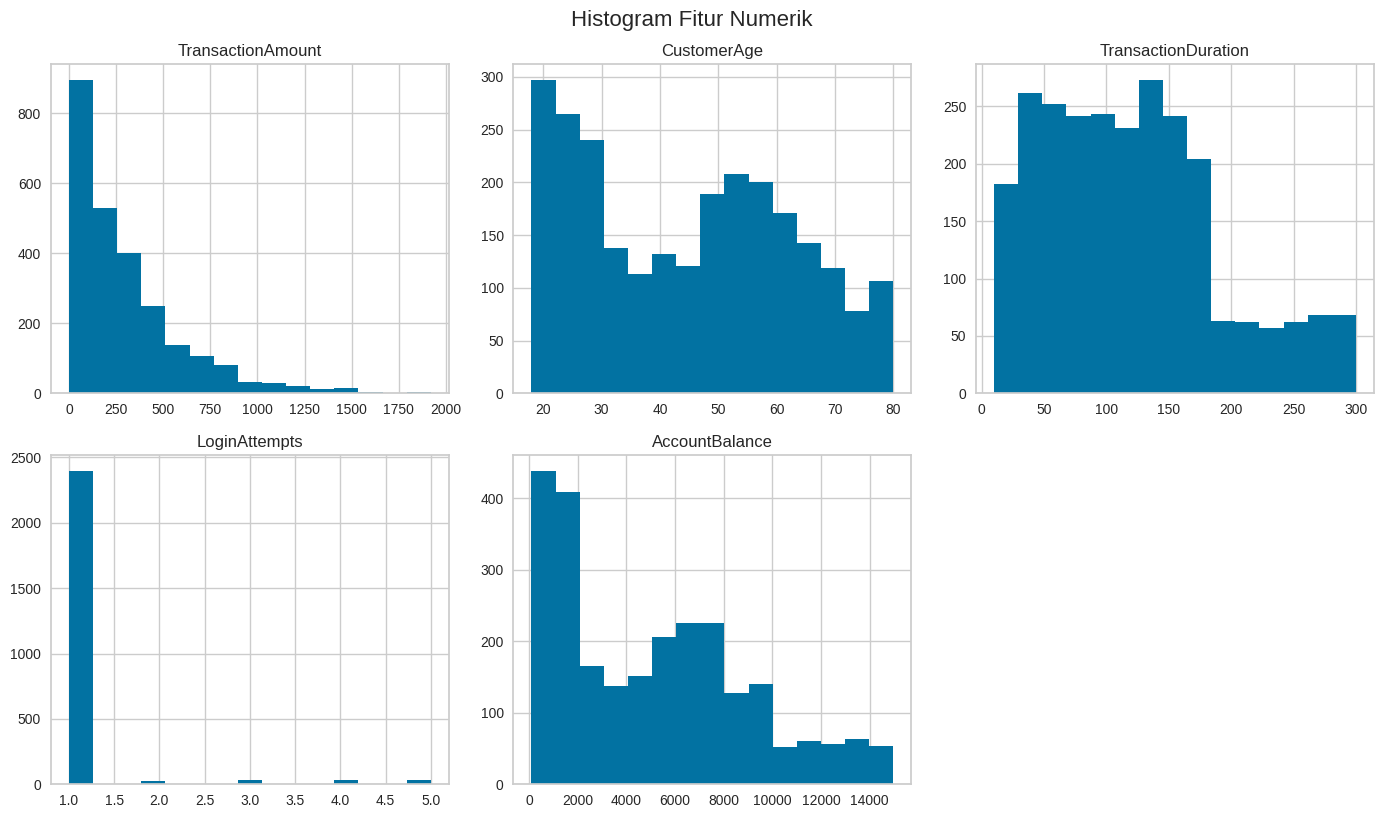

In [9]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# 7. Histogram untuk semua kolom dalam dataset
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Histogram fitur numerik
df[num_cols_no_id].hist(bins=15, figsize=(14, 8), layout=(int(np.ceil(len(num_cols_no_id)/3)), 3))
plt.tight_layout()
plt.suptitle("Histogram Fitur Numerik", y=1.02, fontsize=16)
plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

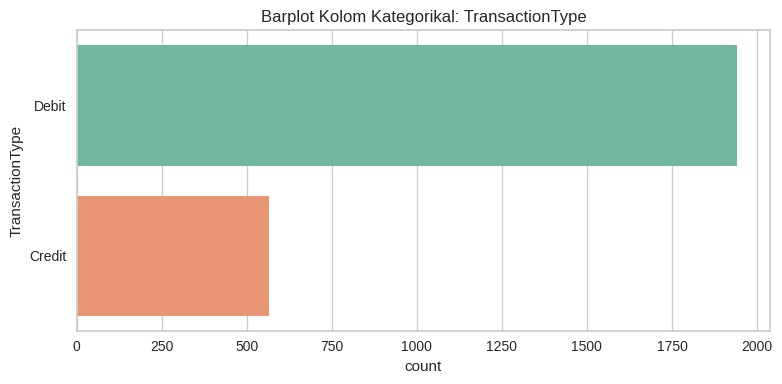

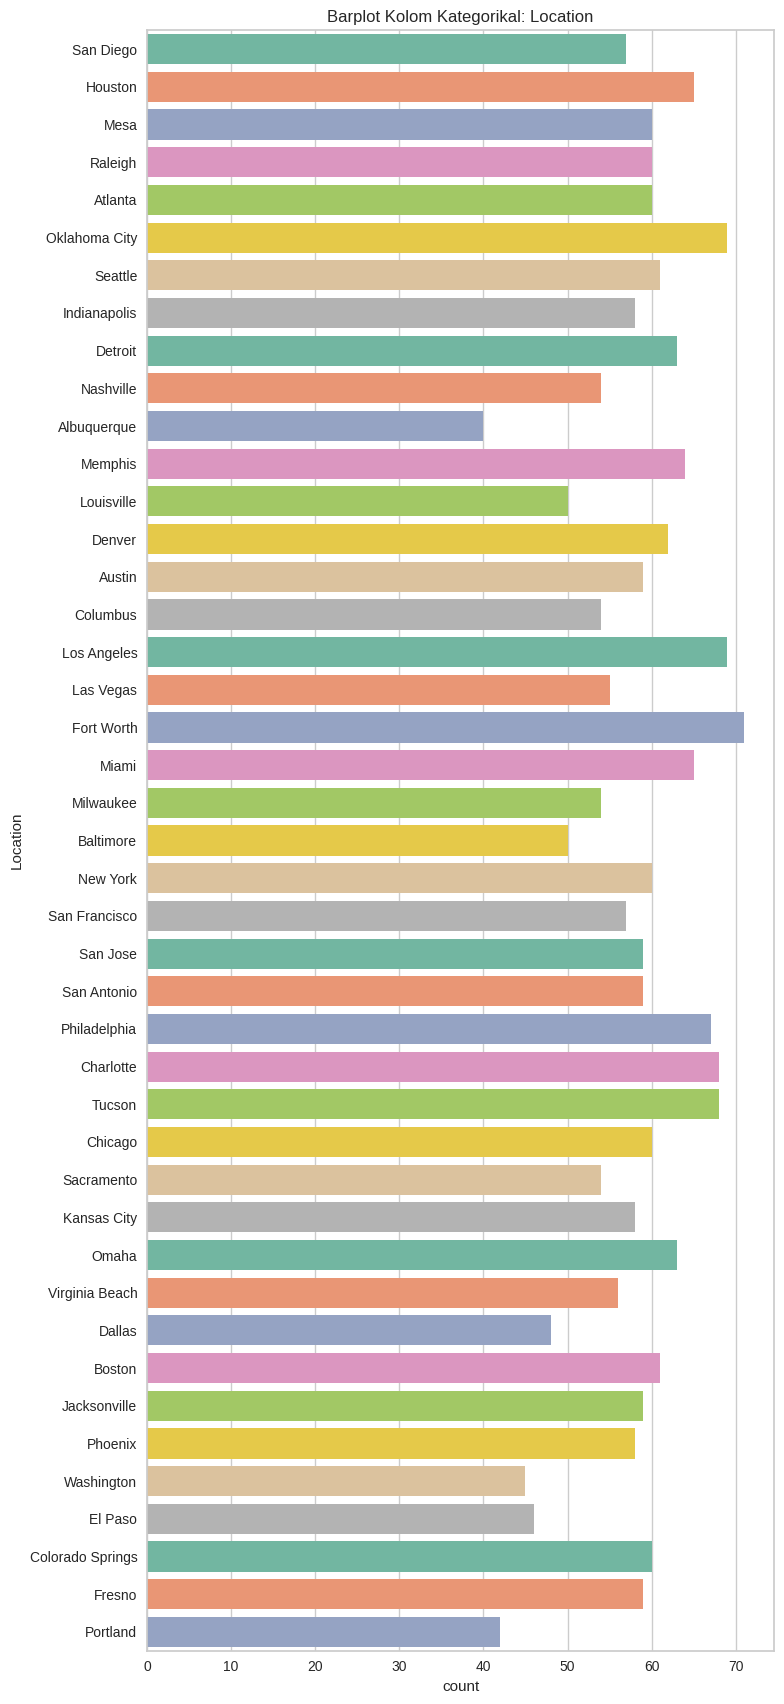

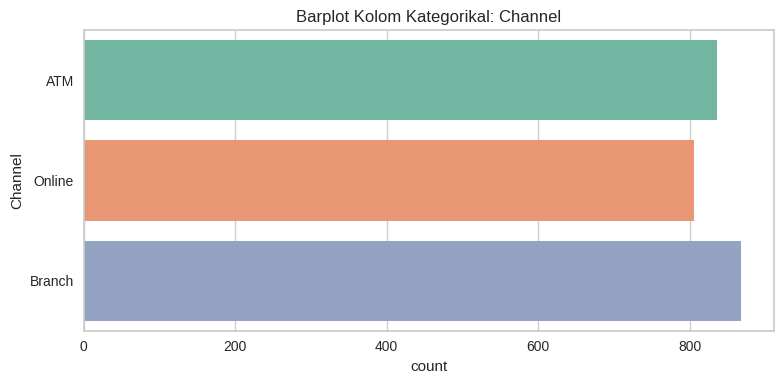

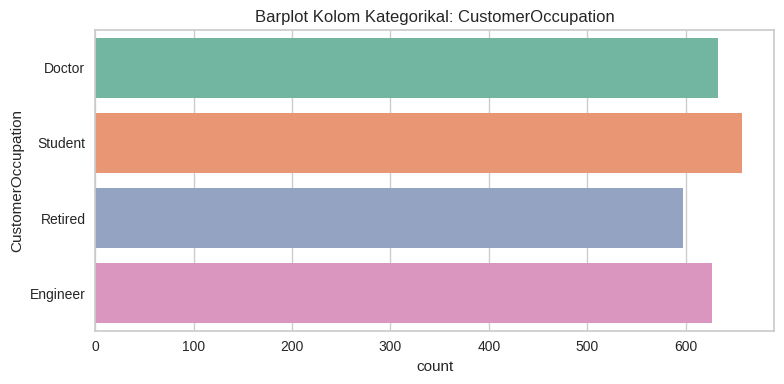

In [10]:
# Barplot fitur kategorikal
for col in cat_cols_no_id:
    n_unique = df[col].nunique()
    height = max(4, n_unique * 0.4)
    plt.figure(figsize=(8, height))
    ax = sns.countplot(y=col, hue=col, data=df, palette='Set2', legend=False)
    plt.title(f'Barplot Kolom Kategorikal: {col}')
    ax.tick_params(axis='y', labelsize=10)
    plt.tight_layout()
    plt.show()

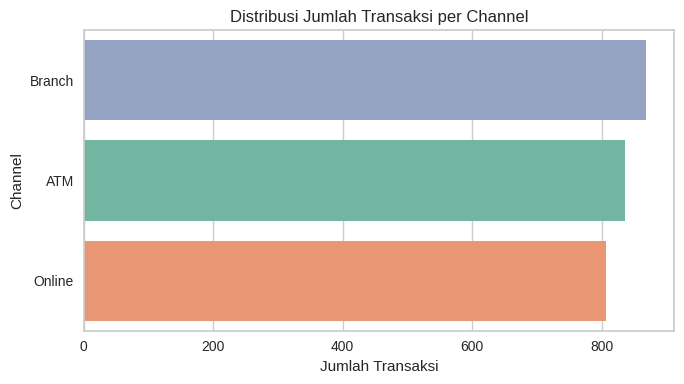

In [12]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(7,4))
ax = sns.countplot(y='Channel', data=df, hue='Channel', palette='Set2', order=df['Channel'].value_counts().index, legend=False)
ax.tick_params(axis='y', labelsize=10)
plt.title('Distribusi Jumlah Transaksi per Channel')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()

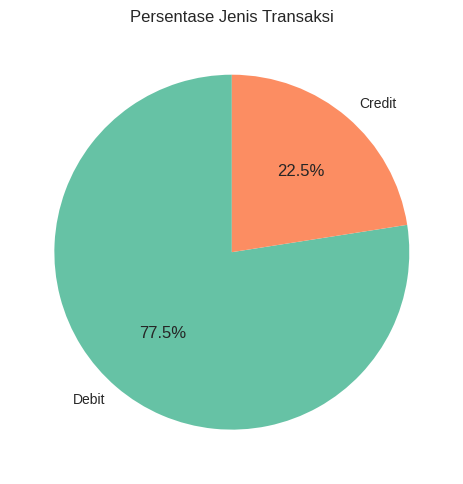

In [13]:
plt.figure(figsize=(5,5))
df['TransactionType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Persentase Jenis Transaksi')
plt.ylabel('')
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [14]:
# Mengecek dataset menggunakan isnull().sum()
# Salin dataframe untuk preprocessing
df_prep = df.copy()

# Cek missing values
print('Missing values tiap kolom:')
print(df_prep.isnull().sum())
print('\n')

Missing values tiap kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64




In [15]:
# Mengecek dataset menggunakan duplicated().sum()
print('Jumlah data duplikat:', df_prep.duplicated().sum())
print('\n')

Jumlah data duplikat: 21




In [16]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Scaling fitur numerik
num_cols_no_id = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
scaler = MinMaxScaler()
df_prep[num_cols_no_id] = scaler.fit_transform(df_prep[num_cols_no_id])

# Tampilkan head setelah scaling
display(df_prep.head())

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [17]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_cols = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df_prep = df_prep.drop(columns=id_cols)

In [18]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
# 5. Encoding fitur kategorikal
cat_cols = df_prep.select_dtypes(include=['object', 'category']).columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_prep[col] = le.fit_transform(df_prep[col].astype(str))
    le_dict[col] = le  # Simpan encoder untuk  inverse_transform

    # Tampilkan head setelah encoding
    display(df_prep.head())

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,1178,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,1262,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,818,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,1939,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,1178,1,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,1262,1,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,818,1,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,1939,0,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,1178,1,15,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,1262,1,23,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,818,1,33,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,1939,0,1,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,1178,1,15,0,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,1262,1,23,2,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,818,1,33,2,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,1939,0,1,2,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 8:06:39


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [19]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
print(df_prep.columns.tolist())

['TransactionAmount', 'PreviousTransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionDate']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [20]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_prep = df_prep.dropna().reset_index(drop=True)

In [21]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_prep = df_prep.drop_duplicates().reset_index(drop=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [22]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# untuk semua fitur numerik, drop jika nilai di luar range [Q1-1.5*IQR, Q3+1.5*IQR]
for col in num_cols_no_id:
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Drop outlier
    df_prep = df_prep[(df_prep[col] >= lower_bound) & (df_prep[col] <= upper_bound)]

In [23]:
df_prep = df_prep.reset_index(drop=True)

In [24]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# binning untuk CustomerAge
df_prep['CustomerAge_bin'] = pd.cut(df_prep['CustomerAge'], bins=[0, 0.3, 0.6, 1], labels=['Muda', 'Dewasa', 'Senior'])
# binning untuk TransactionAmount
df_prep['TransactionAmount_bin'] = pd.cut(df_prep['TransactionAmount'], bins=[0, 0.3, 0.6, 1], labels=['Kecil', 'Sedang', 'Besar'])

# Encode hasil binning
le_age = LabelEncoder()
df_prep['CustomerAge_bin'] = le_age.fit_transform(df_prep['CustomerAge_bin'].astype(str))
le_trx = LabelEncoder()
df_prep['TransactionAmount_bin'] = le_trx.fit_transform(df_prep['TransactionAmount_bin'].astype(str))

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [25]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df_prep.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,CustomerAge_bin,TransactionAmount_bin
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.0,2183.000000,2183.000000,2183.000000,2183.000000
mean,0.133220,1253.670179,0.788823,21.472744,1.012368,0.429625,1.531837,0.375153,0.0,0.336071,180.975263,1.087494,0.109482
std,0.113145,724.690314,0.440631,12.448282,0.827646,0.286193,1.152357,0.241710,0.0,0.261031,103.558475,0.826988,0.313779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.040634,629.500000,1.000000,11.000000,0.000000,0.145161,0.000000,0.181034,0.0,0.094298,93.000000,0.000000,0.000000
50%,0.103776,1247.000000,1.000000,22.000000,1.000000,0.435484,2.000000,0.344828,0.0,0.310368,181.000000,1.000000,0.000000
75%,0.195734,1879.500000,1.000000,32.000000,2.000000,0.661290,3.000000,0.522414,0.0,0.506331,271.000000,2.000000,0.000000
max,0.470558,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,3.000000,2.000000


In [26]:
# Drop kolom datetime dan kolom waktu
cols_to_drop = ['TransactionDate', 'TransactionMonth', 'PreviousTransactionDate']
df_prep = df_prep.drop(columns=[col for col in cols_to_drop if col in df_prep.columns])

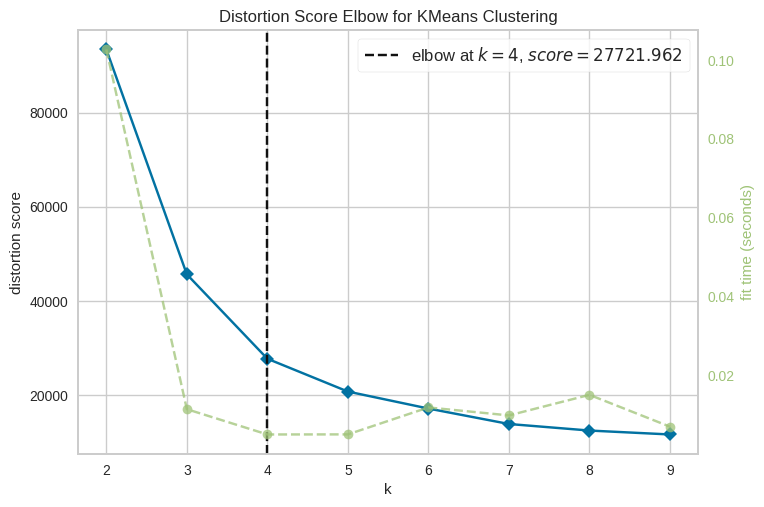

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_prep)
visualizer.show()

In [28]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_prep)

KMeans(n_clusters=4, random_state=42)

In [29]:
labels = kmeans.labels_
df_prep['Target'] = labels

Jalankan cell code ini untuk menyimpan model kamu.

In [30]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = kmeans.predict(df_prep.drop(columns=['Target']))
silhouette = silhouette_score(df_prep.drop(columns=['Target']), labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.4959


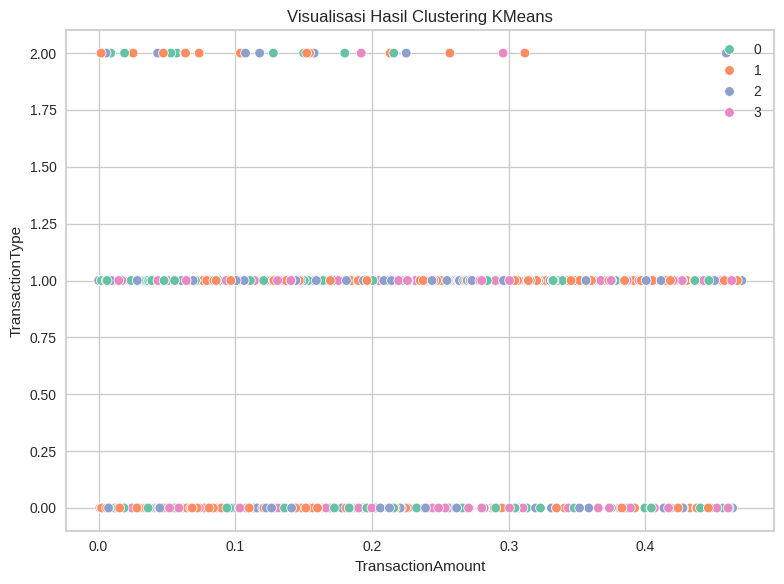

In [32]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_prep.iloc[:,0], y=df_prep.iloc[:,1], hue=labels, palette='Set2', legend='full')
plt.title('Visualisasi Hasil Clustering KMeans')
plt.xlabel(df_prep.columns[0])
plt.ylabel(df_prep.columns[1])
plt.tight_layout()
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

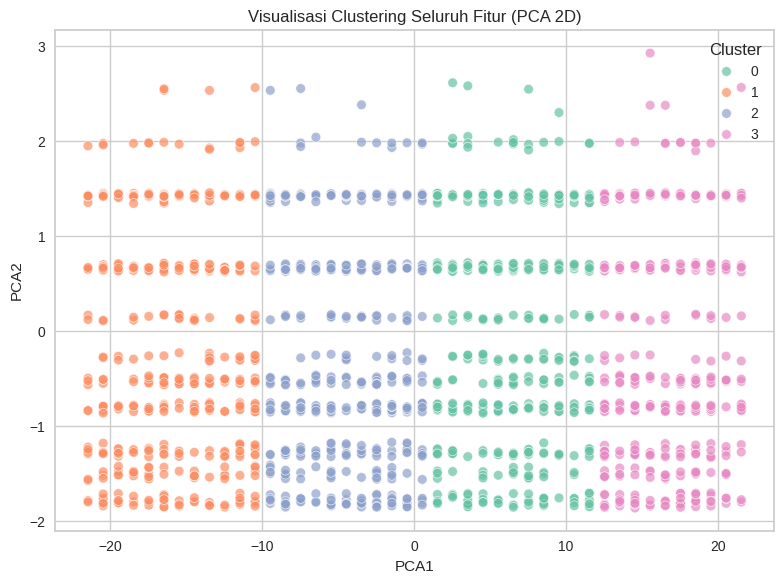

In [33]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)
# PCA pada seluruh fitur, hasilkan 2 komponen

pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(df_prep.drop(columns=['Target']))  # pastikan 'Target' tidak ikut diproses

# Buat dataframe PCA
df_vis = pd.DataFrame(X_pca_vis, columns=['PCA1', 'PCA2'])
df_vis['Cluster'] = df_prep['Target']

# Visualisasi 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df_vis, alpha=0.7)
plt.title('Visualisasi Clustering Seluruh Fitur (PCA 2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [34]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

joblib.dump(model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [35]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# List fitur numerik yang akan dianalisis
num_cols = df_prep.select_dtypes(include=[float, int]).columns.tolist()
if 'Target' in num_cols: num_cols.remove('Target')  # pastikan Target tidak ikut

# Analisis deskriptif: mean, min, max, std, median per cluster
agg_funcs = ['mean', 'min', 'max', 'std', 'median']

desc_per_cluster = df_prep.groupby('Target')[num_cols].agg(agg_funcs).T
display(desc_per_cluster)

Target                                0          1          2          3
TransactionAmount     mean     0.132890   0.131012   0.136315   0.132690
                      min      0.000000   0.000031   0.000099   0.000599
                      max      0.461250   0.467223   0.470558   0.463168
                      std      0.108930   0.110797   0.117871   0.115382
                      median   0.101464   0.104935   0.108112   0.101584
TransactionType       mean     0.791367   0.813356   0.785331   0.760331
                      min      0.000000   0.000000   0.000000   0.000000
                      max      2.000000   2.000000   2.000000   2.000000
                      std      0.440717   0.439585   0.440429   0.441619
                      median   1.000000   1.000000   1.000000   1.000000
Location              mean    27.872302   5.626712  17.094812  38.297521
                      min     23.000000   0.000000  12.000000  34.000000
                      max     33.000000  11.000000  22.000000  43.000000
                      std      3.136514   3.342800   3.134950   2.703865
                      median  28.000000   5.500000  17.000000  38.000000
Channel               mean     0.953237   1.015411   1.028623   1.057851
                      min      0.000000   0.000000   0.000000   0.000000
                      max      3.000000   3.000000   3.000000   3.000000
                      std      0.823948   0.820891   0.835526   0.829553
                      median   1.000000   1.000000   1.000000   1.000000
CustomerAge           mean     0.438066   0.440151   0.437619   0.397994
                      min      0.000000   0.000000   0.000000   0.000000
                      max      1.000000   1.000000   1.000000   1.000000
                      std      0.289288   0.299511   0.273163   0.279429
                      median   0.467742   0.451613   0.451613   0.354839
CustomerOccupation    mean     1.661871   1.553082   1.422182   1.483471
                      min      0.000000   0.000000   0.000000   0.000000
                      max      4.000000   4.000000   4.000000   4.000000
                      std      1.129802   1.158424   1.137788   1.175023
                      median   2.000000   2.000000   1.000000   1.000000
TransactionDuration   mean     0.366100   0.377929   0.390778   0.364156
                      min      0.006897   0.000000   0.000000   0.000000
                      max      0.996552   1.000000   0.996552   0.986207
                      std      0.226304   0.244632   0.255030   0.239177
                      median   0.337931   0.355172   0.372414   0.339655
LoginAttempts         mean     0.000000   0.000000   0.000000   0.000000
                      min      0.000000   0.000000   0.000000   0.000000
                      max      0.000000   0.000000   0.000000   0.000000
                      std      0.000000   0.000000   0.000000   0.000000
                      median   0.000000   0.000000   0.000000   0.000000
AccountBalance        mean     0.323102   0.334015   0.352417   0.334571
                      min      0.001478   0.001125   0.000774   0.000000
                      max      0.989193   0.997144   0.997633   1.000000
                      std      0.250060   0.257214   0.266041   0.271719
                      median   0.294275   0.322090   0.341624   0.276895
CustomerAge_bin       mean     1.129496   1.145548   1.017889   1.049587
                      min      0.000000   0.000000   0.000000   0.000000
                      max      3.000000   3.000000   3.000000   3.000000
                      std      0.843284   0.812244   0.833679   0.812442
                      median   1.000000   1.000000   1.000000   1.000000
TransactionAmount_bin mean     0.107914   0.113014   0.110912   0.105372
                      min      0.000000   0.000000   0.000000   0.000000
                      max      2.000000   1.000000   1.000000   1.000000
                      std      0.316299   0.316881   0.314

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Umur Dewasa dan Saldo Rekening Relatif Besar)**:
  - **Rata-rata (mean) AccountBalance:** 0.340 (relatif besar)
  - **Rata-rata (mean) CustomerAge:** 0.434 (dewasa)
  - **Rata-rata TransactionAmount:** 0.136 (cukup besar)
  - **Analisis:** Cluster ini berisi nasabah dengan usia dewasa, saldo rekening besar dan transaksi yang dilakukan cukup besar.
Rekomendasi:
    - Tabungan reguler dengan benefit seperti cashback transaksi, diskon merchant, atau loyalty program untuk meningkatkan frekuensi transaksi.
    - Kartu debit/kredit dengan fitur reward point atau gratis biaya admin bulanan.
    - Promosi produk digital banking yang user-friendly.

2. **Cluster 1: (Nasabah Umur Tua dan Saldo Kecil)**:
  - **Rata-rata (mean) AccountBalance:** 0.331 (kecil)
  - **Rata-rata (mean) CustomerAge:** 0.443 (tua)
  - **Rata-rata TransactionAmount:** 0.131 (kecil hingga menengah)
  - **Analisis:** Cluster ini berisi nasabah dengan usia tua, saldo rekening rata-rata kecil dan transaksi yang dilakukan cenderung kecil hingga menengah.
Rekomendasi:
    - Tabungan pensiun atau deposito berjangka yang aman dan mudah diakses.
    - Edukasi literasi keuangan untuk meningkatkan saldo dan aktivitas transaksi.
    - Penawaran asuransi kesehatan atau perlindungan jiwa yang relevan untuk usia dewasa.

3. **Cluster 2: (Nasabah Umur Muda dan Saldo Cukup Besar )**:
  - **Rata-rata (mean) AccountBalance:** 0.330 (cukup besar)
  - **Rata-rata (mean) CustomerAge:** 0.40 (muda)
  - **Rata-rata TransactionAmount:** 0.133 (sedang)
  - **Analisis:** Cluster ini berisi nasabah dengan usia muda, saldo rekening cukup besar dan transaksi yang dilakukan cukup.
Rekomendasi:
    - Tabungan pelajar/mahasiswa dengan biaya admin rendah dan fasilitas mobile banking.
    - Program edukasi menabung sejak dini dan promosi fitur tabungan digital.
    - Penawaran produk e-wallet atau integrasi dengan layanan digital lifestyle.

4. **Cluster 3: (Nasabah Umur Tua dan Saldo Besar )**:
  - **Rata-rata (mean) AccountBalance:** 0.344 (besar)
  - **Rata-rata (mean) CustomerAge:** 0.44 (tua)
  - **Rata-rata TransactionAmount:** 0.132 (sedang)
  - **Analisis:** Cluster ini berisi nasabah dengan usia tua, saldo rekening besar dan transaksi yang dilakukan rata-rata sedang.
Rekomendasi:
    - Produk investasi seperti reksa dana, obligasi, atau deposito plus layanan konsultan keuangan.
    - Tabungan berjangka premium atau private banking dengan berbagai fasilitas eksklusif.
    - Penawaran bundling produk investasi dan asuransi untuk proteksi aset jangka panjang.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [36]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
clustering = df_prep.columns.tolist()
print(clustering)

['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge_bin', 'TransactionAmount_bin', 'Target']


In [37]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_prep.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [38]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

# Asumsikan kamu masih punya scaler dari preprocessing, dan df_prep sebagai dataframe yang sudah dikelompokkan
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

df_inverse = df_prep.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Tampilkan dataset yang sudah di-inverse
df_inverse.head()


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,TransactionAmount_bin,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,2,0,3
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2,0,2
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,1,0,0
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,1,0,0
4,92.15,1,28,0,18.0,3,172.0,1.0,781.68,3,0,0


In [39]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

df_inverse['CustomerAge_bin'] = le_age.inverse_transform(df_inverse['CustomerAge_bin'].astype(int))
df_inverse['TransactionAmount_bin'] = le_trx.inverse_transform(df_inverse['TransactionAmount_bin'].astype(int))
df_inverse.head()


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,TransactionAmount_bin,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,Senior,Kecil,3
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,Senior,Kecil,2
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,Muda,Kecil,0
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,Muda,Kecil,0
4,92.15,1,28,0,18.0,3,172.0,1.0,781.68,nan,Kecil,0


In [41]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Numerik: mean, min, max per cluster
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
num_agg = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])

# Kategorikal: mode per cluster
categorical_cols = df_inverse.select_dtypes(include='object').columns.tolist()
if 'Target' in categorical_cols:
    categorical_cols.remove('Target')

cat_mode = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode().iloc[0])

display(num_agg)
display(cat_mode)

TransactionAmount               CustomerAge              \
                    mean   min     max        mean   min   max   
Target                                                           
0             255.255324  0.26  885.33   45.160072  18.0  80.0   
1             251.652380  0.32  896.79   45.289384  18.0  80.0   
2             261.828891  0.45  903.19   45.132379  18.0  80.0   
3             254.871612  1.41  889.01   42.675620  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               116.169065  12.0  299.0           1.0  1.0  1.0   
1               119.599315  10.0  300.0           1.0  1.0  1.0   
2               123.325581  10.0  299.0           1.0  1.0  1.0   
3               115.605372  10.0  296.0           1.0  1.0  1.0   

       AccountBalance                    
                 mean     min       max  
Target                                   
0         4907.952320  123.24  14817.22  
1         5070.297363  117.98  14935.50  
2         5344.059857  112.76  14942.78  
3         5078.573161  101.25  14977.99

,CustomerAge_bin,TransactionAmount_bin
Target,,
0,Muda,Kecil
1,Muda,Kecil
2,Muda,Kecil
3,Muda,Kecil


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Umur Dewasa dan Saldo Rekening Relatif Besar)**:
  - **Rata-rata (mean) AccountBalance:** $5070 (relatif besar)
  - **Rata-rata (mean) CustomerAge:** 45 (dewasa)
  - **Rata-rata TransactionAmount:** \$255 (cukup besar)
  - **Analisis:** Cluster ini berisi nasabah dengan usia dewasa, saldo rekening besar dan transaksi yang dilakukan cukup besar.
Rekomendasi:
    - Tabungan reguler dengan benefit seperti cashback transaksi, diskon merchant, atau loyalty program untuk meningkatkan frekuensi transaksi.
    - Kartu debit/kredit dengan fitur reward point atau gratis biaya admin bulanan.
    - Promosi produk digital banking yang user-friendly.

2. **Cluster 1: (Nasabah Umur Dewasa Lanjut dan Saldo Kecil)**:
  - **Rata-rata (mean) AccountBalance:** $4908 (kecil)
  - **Rata-rata (mean) CustomerAge:** 46 (dewasa lanjut)
  - **Rata-rata TransactionAmount:** \$252 (kecil hingga menengah)
  - **Analisis:** Cluster ini berisi nasabah dengan usia dewasa lanjut, saldo rekening rata-rata kecil dan transaksi yang dilakukan cenderung kecil hingga menengah.
Rekomendasi:
    - Tabungan pensiun atau deposito berjangka yang aman dan mudah diakses.
    - Edukasi literasi keuangan untuk meningkatkan saldo dan aktivitas transaksi.
    - Penawaran asuransi kesehatan atau perlindungan jiwa yang relevan untuk usia dewasa.

3. **Cluster 2: (Nasabah Umur Remaja dan Saldo Cukup Besar )**:
  - **Rata-rata (mean) AccountBalance:** $5079 (cukup besar)
  - **Rata-rata (mean) CustomerAge:** 43 (relatif muda)
  - **Rata-rata TransactionAmount:** \$255 (sedang)
  - **Analisis:** Cluster ini berisi nasabah dengan usia muda, saldo rekening cukup besar dan transaksi yang dilakukan cukup.
Rekomendasi:
    - Tabungan pelajar/mahasiswa dengan biaya admin rendah dan fasilitas mobile banking.
    - Program edukasi menabung sejak dini dan promosi fitur tabungan digital.
    - Penawaran produk e-wallet atau integrasi dengan layanan digital lifestyle.

4. **Cluster 3: (Nasabah Umur Dewasa Lanjut dan Saldo Besar)**:
  - **Rata-rata (mean) AccountBalance:** $5344 (besar)
  - **Rata-rata (mean) CustomerAge:** 46 (dewasa lanjut)
  - **Rata-rata TransactionAmount:** \$262 (besar)
  - **Analisis:** Cluster ini berisi nasabah dengan usia dewasa lanjut, saldo rekening besar dan transaksi yang

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [42]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df_inverse = df_prep.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,TransactionAmount_bin,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,2,0,3
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2,0,2
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,1,0,0
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,1,0,0
4,92.15,1,28,0,18.0,3,172.0,1.0,781.68,3,0,0


In [43]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.